<span style="color:#87cefa; font-size:200%">Plots for simulations in first step</span> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches



WolframKernelException: Cannot locate a kernel automatically. Please provide an explicit kernel path.

In [2]:
ny = 36
nx = 96
convmesh = np.load("./conv_geo_mesh_center.npy")
convmesh_x = np.load("./conv_geo_mesh_x.npy")
convmesh_y = np.load("./conv_geo_mesh_y.npy")

almesh = np.load("./al_geo_mesh_center.npy")
almesh_x = np.load("./al_geo_mesh_x.npy")
almesh_y = np.load("./al_geo_mesh_y.npy")
co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")
print(np.shape(co_facing))
print(np.shape(al_facing))
def conv_distance_center(first_point, second_point):
    x_range = x_convmeshinfo[first_point[1],first_point[0]]-x_convmeshinfo[second_point[1],second_point[0]]
    y_range = y_convmeshinfo[first_point[1],first_point[0]]-y_convmeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def conv_distance_point(first_point, second_point):
    x_range = convmesh_x[first_point[2],first_point[1],first_point[0]]-convmesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = convmesh_y[first_point[2],first_point[1],first_point[0]]-convmesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_almeshinfo[first_point[1],first_point[0]]-x_almeshinfo[second_point[1],second_point[0]]
    y_range = y_almeshinfo[first_point[1],first_point[0]]-y_almeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = almesh_x[first_point[2],first_point[1],first_point[0]]-almesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = almesh_y[first_point[2],first_point[1],first_point[0]]-almesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result



def total_pressure(ne,te,na,ti):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
    return pr

def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
dumx_convmeshinfo = convmesh[:,0]
dumy_convmeshinfo = convmesh[:,1]
x_convmeshinfo = dumx_convmeshinfo.reshape(ny+2,nx+2)
y_convmeshinfo = dumy_convmeshinfo.reshape(ny+2,nx+2)

dumx_almeshinfo = almesh[:,0]
dumy_almeshinfo = almesh[:,1]
x_almeshinfo = dumx_almeshinfo.reshape(ny+2,nx+2)
y_almeshinfo = dumy_almeshinfo.reshape(ny+2,nx+2)



#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)

conv_sep_out_target = np.zeros(2)
conv_sep_out_target[0] = convmesh_x[1,18,96]
conv_sep_out_target[1] = convmesh_y[1,18,96]

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = almesh_x[1,18,96]
al_sep_out_target[1] = almesh_y[1,18,96]
convmesh_x_cen = np.sum(convmesh_x, axis = 0)/4
convmesh_y_cen = np.sum(convmesh_y, axis = 0)/4
almesh_x_cen = np.sum(almesh_x, axis = 0)/4
almesh_y_cen = np.sum(almesh_y, axis = 0)/4
print(conv_sep_out_target)
conv_sep_out_target_dist = np.zeros(ny+2)
X_point = []
for i in range(ny+2):
    conv_sep_out_target_dist[i] = conv_distance_point([96,i,1],[96,18,1])
    if i<18:
        conv_sep_out_target_dist[i] = -conv_sep_out_target_dist[i]
    
conv_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_target_dist[i] = conv_distance_point([1,i,1],[1,18,1])
    if i<18:
        conv_sep_in_target_dist[i] = -conv_sep_in_target_dist[i]
print(conv_sep_out_target_dist)

print(al_sep_out_target)
al_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    if i<18:
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
    
al_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([1,i,1],[1,18,1])
    if i<18:
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]


        
        
conv_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_midplane_dist[i] = conv_distance_point([51,i,1],[51,18,1])
    if i<18:
        conv_sep_out_midplane_dist[i] = -conv_sep_out_midplane_dist[i]
    
conv_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_midplane_dist[i] = conv_distance_point([29,i,1],[29,18,1])
    if i<18:
        conv_sep_in_midplane_dist[i] = -conv_sep_in_midplane_dist[i]


al_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    if i<18:
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
    
al_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_midplane_dist[i] = al_distance_point([29,i,1],[29,18,1])
    if i<18:
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]

    
conv_Xpt_dist = np.zeros(20)
for i in range(20):
    conv_Xpt_dist[i] = conv_distance_center([78,18],[78+i,18])

    
    
al_Xpt_dist = np.zeros(20)
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)





(3, 38, 98)
(3, 38, 98)
[ 1.46925157 -1.29399156]
[-0.0715723  -0.07152744 -0.06704153 -0.06229474 -0.05731827 -0.05215115
 -0.04692141 -0.04169072 -0.03650874 -0.03143631 -0.02655407 -0.02190946
 -0.01750687 -0.01347613 -0.00982187 -0.00661739 -0.00386102 -0.00163475
  0.          0.00099463  0.00205597  0.00379204  0.00621517  0.00931366
  0.01314076  0.0176591   0.02284651  0.02871627  0.03528336  0.04247052
  0.0503574   0.05881249  0.06791765  0.07758154  0.08785052  0.09866668
  0.10996054  0.12180333]
[ 1.49532367 -1.39853962]
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


<span style="color:#87cefa; font-size:150%">Total Heat Flux</span> 

In [3]:
fht_b2fplasmf_co_KSTAR_noNe = np.load("./../fht_b2fplasmf_co_KSTAR_noNe.npy")
fht_b2fplasmf_co_ITER_noNe = np.load("./../fht_b2fplasmf_co_ITER_noNe.npy")
fht_b2fplasmf_co_KDEMO_noNe = np.load("./../fht_b2fplasmf_co_KDEMO_noNe.npy")



fht_b2fplasmf_al_KSTAR_noNe = np.load("./../fht_b2fplasmf_al_KSTAR_noNe.npy")
fht_b2fplasmf_al_ITER_noNe = np.load("./../fht_b2fplasmf_al_ITER_noNe.npy")
fht_b2fplasmf_al_KDEMO_noNe = np.load("./../fht_b2fplasmf_al_KDEMO_noNe.npy")

In [4]:
fht_b2fplasmf_co_KSTAR_3e16Ne = np.load("./../fht_b2fplasmf_co_KSTAR_3e16Ne.npy")
fht_b2fplasmf_co_ITER_3e16Ne = np.load("./../fht_b2fplasmf_co_ITER_3e16Ne.npy")
fht_b2fplasmf_co_KDEMO_3e16Ne = np.load("./../fht_b2fplasmf_co_KDEMO_3e16Ne.npy")
fht_b2fplasmf_co_32MW_3e16Ne = np.load("./../fht_b2fplasmf_co_1.6e7_3e16.npy")



fht_b2fplasmf_al_KSTAR_3e16Ne = np.load("./../fht_b2fplasmf_al_KSTAR_3e16Ne.npy")
fht_b2fplasmf_al_ITER_3e16Ne = np.load("./../fht_b2fplasmf_al_ITER_3e16Ne.npy")
fht_b2fplasmf_al_KDEMO_3e16Ne = np.load("./../fht_b2fplasmf_al_KDEMO_3e16Ne.npy")
fht_b2fplasmf_al_32MW_3e16Ne = np.load("./../fht_b2fplasmf_al_1.6e7_3e16.npy")


fht_b2fplasmf_co_KSTAR_3e19Ne = np.load("./../fht_b2fplasmf_co_KSTAR_3e19Ne.npy")
fht_b2fplasmf_co_ITER_3e19Ne = np.load("./../fht_b2fplasmf_co_ITER_3e19Ne.npy")
fht_b2fplasmf_co_KDEMO_3e19Ne = np.load("./../fht_b2fplasmf_co_KDEMO_3e19Ne.npy")



fht_b2fplasmf_al_KSTAR_3e19Ne = np.load("./../fht_b2fplasmf_al_KSTAR_3e19Ne.npy")
fht_b2fplasmf_al_ITER_3e19Ne = np.load("./../fht_b2fplasmf_al_ITER_3e19Ne.npy")
fht_b2fplasmf_al_KDEMO_3e19Ne = np.load("./../fht_b2fplasmf_al_KDEMO_3e19Ne.npy")
wtf = np.load("./../fhe_b2fstate_al_ITER_3e16Ne.npy")


fht_b2fplasmf_co_KSTAR_ws3_3e16Ne = np.load("./../fht_b2fplasmf_co_KSTAR_ws3_3e16Ne.npy")
fht_b2fplasmf_co_KSTAR_ws3_3e19Ne = np.load("./../fht_b2fplasmf_co_KSTAR_ws3_3e19Ne.npy")


fht_b2fplasmf_co_32MW_noNe = np.load("./../fht_b2fplasmf_co_32MW_noNe.npy")

<span style="color:#87cefa; font-size:150%">Potential</span> 

In [5]:
po_b2fplasmf_al_KSTAR_noNe = np.load("./../po_b2fplasmf_al_KSTAR_noNe.npy")
po_b2fplasmf_al_KDEMO_noNe =np.load("./../po_b2fplasmf_al_KDEMO_noNe.npy")
po_b2fplasmf_co_KSTAR_noNe = np.load("./../po_b2fplasmf_co_KSTAR_noNe.npy")
po_b2fplasmf_co_KDEMO_noNe = np.load("./../po_b2fplasmf_co_KDEMO_noNe.npy")

In [6]:



fhe_b2fstate_co_KSTAR_noNe = np.load("./../fhe_b2fstate_co_KSTAR_noNe.npy")
fhe_b2fstate_co_KSTAR_3e16Ne = np.load("./../fhe_b2fstate_co_KSTAR_3e16Ne.npy")
fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./../fhe_b2fstate_co_KSTAR_3e19Ne.npy")

fhe_b2fstate_al_KSTAR_noNe = np.load("./../fhe_b2fstate_al_KSTAR_noNe.npy")
fhe_b2fstate_al_KSTAR_3e16Ne = np.load("./../fhe_b2fstate_al_KSTAR_3e16Ne.npy")
fhe_b2fstate_al_KSTAR_3e19Ne = np.load("./../fhe_b2fstate_al_KSTAR_3e19Ne.npy")


fhi_b2fstate_co_KSTAR_noNe = np.load("./../fhi_b2fstate_co_KSTAR_noNe.npy")
fhi_b2fstate_co_KSTAR_3e16Ne = np.load("./../fhi_b2fstate_co_KSTAR_3e16Ne.npy")
fhi_b2fstate_co_KSTAR_3e19Ne = np.load("./../fhi_b2fstate_co_KSTAR_3e19Ne.npy")

fhi_b2fstate_al_KSTAR_noNe = np.load("./../fhi_b2fstate_al_KSTAR_noNe.npy")
fhi_b2fstate_al_KSTAR_3e16Ne = np.load("./../fhi_b2fstate_al_KSTAR_3e16Ne.npy")
fhi_b2fstate_al_KSTAR_3e19Ne = np.load("./../fhi_b2fstate_al_KSTAR_3e19Ne.npy")






fhe_b2fstate_co_KDEMO_noNe = np.load("./../fhe_b2fstate_co_KDEMO_noNe.npy")
fhe_b2fstate_co_KDEMO_3e16Ne = np.load("./../fhe_b2fstate_co_KDEMO_3e16Ne.npy")
fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./../fhe_b2fstate_co_KDEMO_3e19Ne.npy")

fhe_b2fstate_al_KDEMO_noNe = np.load("./../fhe_b2fstate_al_KDEMO_noNe.npy")
fhe_b2fstate_al_KDEMO_3e16Ne = np.load("./../fhe_b2fstate_al_KDEMO_3e16Ne.npy")
fhe_b2fstate_al_KDEMO_3e19Ne = np.load("./../fhe_b2fstate_al_KDEMO_3e19Ne.npy")


fhi_b2fstate_co_KDEMO_noNe = np.load("./../fhi_b2fstate_co_KDEMO_noNe.npy")
fhi_b2fstate_co_KDEMO_3e16Ne = np.load("./../fhi_b2fstate_co_KDEMO_3e16Ne.npy")
fhi_b2fstate_co_KDEMO_3e19Ne = np.load("./../fhi_b2fstate_co_KDEMO_3e19Ne.npy")

fhi_b2fstate_al_KDEMO_noNe = np.load("./../fhi_b2fstate_al_KDEMO_noNe.npy")
fhi_b2fstate_al_KDEMO_3e16Ne = np.load("./../fhi_b2fstate_al_KDEMO_3e16Ne.npy")
fhi_b2fstate_al_KDEMO_3e19Ne = np.load("./../fhi_b2fstate_al_KDEMO_3e19Ne.npy")



In [7]:
te_b2fstate_co_KSTAR_noNe  = np.load("./../te_b2fstate_co_KSTAR_noNe.npy")
te_b2fstate_co_KSTAR_3e19Ne= np.load("./../te_b2fstate_co_KSTAR_3e19Ne.npy")
te_b2fstate_co_KDEMO_noNe  = np.load("./../te_b2fstate_co_KDEMO_noNe.npy")
te_b2fstate_co_KDEMO_3e19Ne= np.load("./../te_b2fstate_co_KDEMO_3e19Ne.npy")

te_b2fstate_al_KSTAR_noNe  = np.load("./../te_b2fstate_al_KSTAR_noNe.npy")
te_b2fstate_al_KSTAR_3e19Ne= np.load("./../te_b2fstate_al_KSTAR_3e19Ne.npy")
te_b2fstate_al_KDEMO_noNe  = np.load("./../te_b2fstate_al_KDEMO_noNe.npy")
te_b2fstate_al_KDEMO_3e19Ne= np.load("./../te_b2fstate_al_KDEMO_3e19Ne.npy")


ti_b2fstate_co_KSTAR_noNe  = np.load("./../ti_b2fstate_co_KSTAR_noNe.npy")
ti_b2fstate_co_KSTAR_3e19Ne= np.load("./../ti_b2fstate_co_KSTAR_3e19Ne.npy")
ti_b2fstate_co_KDEMO_noNe  = np.load("./../ti_b2fstate_co_KDEMO_noNe.npy")
ti_b2fstate_co_KDEMO_3e19Ne= np.load("./../ti_b2fstate_co_KDEMO_3e19Ne.npy")

ti_b2fstate_al_KSTAR_noNe  = np.load("./../ti_b2fstate_al_KSTAR_noNe.npy")
ti_b2fstate_al_KSTAR_3e19Ne= np.load("./../ti_b2fstate_al_KSTAR_3e19Ne.npy")
ti_b2fstate_al_KDEMO_noNe  = np.load("./../ti_b2fstate_al_KDEMO_noNe.npy")
ti_b2fstate_al_KDEMO_3e19Ne= np.load("./../ti_b2fstate_al_KDEMO_3e19Ne.npy")
eV = 1.602176634*(10**(-19))



In [8]:
ne_b2fstate_co_KSTAR_noNe=np.load("./../ne_b2fstate_co_KSTAR_noNe.npy")
ne_b2fstate_co_KDEMO_noNe=np.load("./../ne_b2fstate_co_KDEMO_noNe.npy")

ne_b2fstate_al_KSTAR_noNe=np.load("./../ne_b2fstate_al_KSTAR_noNe.npy")
ne_b2fstate_al_KDEMO_noNe=np.load("./../ne_b2fstate_al_KDEMO_noNe.npy")

na_b2fstate_co_KSTAR_noNe=np.load("./../na_b2fstate_co_KSTAR_noNe.npy")
na_b2fstate_co_KDEMO_noNe=np.load("./../na_b2fstate_co_KDEMO_noNe.npy")

na_b2fstate_al_KSTAR_noNe=np.load("./../na_b2fstate_al_KSTAR_noNe.npy")
na_b2fstate_al_KDEMO_noNe=np.load("./../na_b2fstate_al_KDEMO_noNe.npy")

ne_b2fstate_co_KSTAR_3e19Ne=np.load("./../ne_b2fstate_co_KSTAR_3e19Ne.npy")
ne_b2fstate_co_KDEMO_3e19Ne=np.load("./../ne_b2fstate_co_KDEMO_3e19Ne.npy")

ne_b2fstate_al_KSTAR_3e19Ne=np.load("./../ne_b2fstate_al_KSTAR_3e19Ne.npy")
ne_b2fstate_al_KDEMO_3e19Ne=np.load("./../ne_b2fstate_al_KDEMO_3e19Ne.npy")

na_b2fstate_co_KSTAR_3e19Ne=np.load("./../na_b2fstate_co_KSTAR_3e19Ne.npy")
na_b2fstate_co_KDEMO_3e19Ne=np.load("./../na_b2fstate_co_KDEMO_3e19Ne.npy")

na_b2fstate_al_KSTAR_3e19Ne=np.load("./../na_b2fstate_al_KSTAR_3e19Ne.npy")
na_b2fstate_al_KDEMO_3e19Ne=np.load("./../na_b2fstate_al_KDEMO_3e19Ne.npy")

In [9]:
rqrad_b2fplasmf_co_KSTAR_ZeroNe =np.load("./../rqrad_b2fplasmf_co_KSTAR_ZeroNe.npy")
rqrad_b2fplasmf_al_KSTAR_ZeroNe =np.load("./../rqrad_b2fplasmf_al_KSTAR_ZeroNe.npy")

rqrad_b2fplasmf_co_KDEMO_ZeroNe =np.load("./../rqrad_b2fplasmf_co_KDEMO_ZeroNe.npy")
rqrad_b2fplasmf_al_KDEMO_ZeroNe =np.load("./../rqrad_b2fplasmf_al_KDEMO_ZeroNe.npy")

rqrad_b2fplasmf_co_KSTAR_3e19Ne =np.load("./../rqrad_b2fplasmf_co_KSTAR_3e19Ne.npy")
rqrad_b2fplasmf_al_KSTAR_3e19Ne =np.load("./../rqrad_b2fplasmf_al_KSTAR_3e19Ne.npy")

rqrad_b2fplasmf_co_KDEMO_3e19Ne =np.load("./../rqrad_b2fplasmf_co_KDEMO_3e19Ne.npy")
rqrad_b2fplasmf_al_KDEMO_3e19Ne =np.load("./../rqrad_b2fplasmf_al_KDEMO_3e19Ne.npy")



In [10]:
rrana_b2fplasmf_al_KSTAR_noNe=np.load('./../rrana_b2fplasmf_al_KSTAR_noNe.npy')
rrana_b2fplasmf_al_KDEMO_noNe=np.load('./../rrana_b2fplasmf_al_KDEMO_noNe.npy')

rrana_b2fplasmf_co_KSTAR_noNe=np.load('./../rrana_b2fplasmf_al_KSTAR_noNe.npy')
rrana_b2fplasmf_co_KDEMO_noNe=np.load('./../rrana_b2fplasmf_al_KDEMO_noNe.npy')

rrana_b2fplasmf_co_KSTAR_3e19Ne=np.load('./../rrana_b2fplasmf_co_KSTAR_3e19Ne.npy')
rrana_b2fplasmf_co_KDEMO_3e19Ne=np.load('./../rrana_b2fplasmf_co_KDEMO_3e19Ne.npy')

rrana_b2fplasmf_al_KSTAR_3e19Ne=np.load('./../rrana_b2fplasmf_al_KSTAR_3e19Ne.npy')
rrana_b2fplasmf_al_KDEMO_3e19Ne=np.load('./../rrana_b2fplasmf_al_KDEMO_3e19Ne.npy')

In [11]:
rsana_b2fplasmf_al_KSTAR_noNe=np.load('./../rsana_b2fplasmf_al_KSTAR_noNe.npy')
rsana_b2fplasmf_al_KDEMO_noNe=np.load('./../rsana_b2fplasmf_al_KDEMO_noNe.npy')

rsana_b2fplasmf_co_KSTAR_noNe=np.load('./../rsana_b2fplasmf_co_KSTAR_noNe.npy')
rsana_b2fplasmf_co_KDEMO_noNe=np.load('./../rsana_b2fplasmf_co_KDEMO_noNe.npy')

In [12]:
rrahi_b2fplasmf_co_32MW_noNe = np.load('./../rrahi_b2fplasmf_co_32MW_noNe.npy')

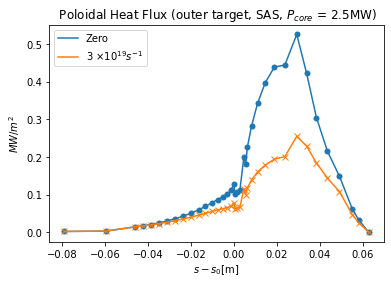

In [13]:
plt.title(r" Poloidal Heat Flux (outer target, SAS, $P_{core}$ = 2.5MW)")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19} s^{-1}$")

plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("SAS heat flux w.r.t impurity.png")


plt.show()

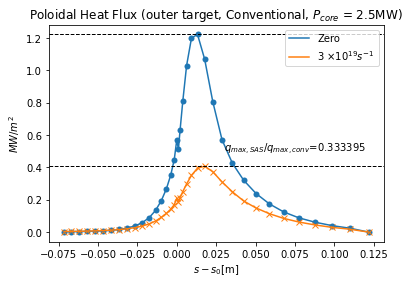

In [14]:
plt.title(r"Poloidal Heat Flux (outer target, Conventional, $P_{core}$ = 2.5MW)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_ws3_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19} s^{-1}$")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_ws3_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend(loc = "upper right")


co_KSTAR_zero_max = np.max(np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000))
co_KSTAR_3e19_max = np.max(np.abs(fht_b2fplasmf_co_KSTAR_ws3_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000))



plt.axhline(y=co_KSTAR_zero_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=co_KSTAR_3e19_max, color='black', linestyle='--', linewidth=1)

frac = co_KSTAR_3e19_max/co_KSTAR_zero_max
plt.text(0.03, 0.5, r'$q_{max,SAS}/q_{max,conv}$=%f ' %frac )

plt.savefig("conv heat flux w.r.t impurity.png")


plt.show()

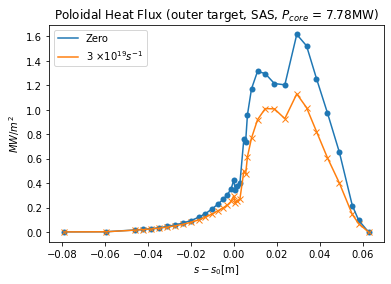

In [15]:
plt.title(r"Poloidal Heat Flux (outer target, SAS, $P_{core}$ = 7.78MW)")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()
plt.savefig("SAS heat flux w.r.t impurity P=7.78.png")


plt.show()

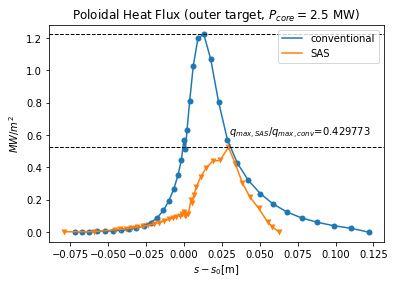

In [16]:
plt.title(r"Poloidal Heat Flux (outer target, $P_{core} =$2.5 MW)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "conventional")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "SAS")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')

co_max = np.max(np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000))
al_max = np.max(np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000))


plt.axhline(y=co_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=al_max, color='black', linestyle='--', linewidth=1)

frac = al_max/co_max
plt.text(0.03, 0.6, r'$q_{max,SAS}/q_{max,conv}$=%f ' %frac )


plt.legend(loc = 'upper right')
plt.savefig("SAS vs conventional(2.5MW).png")


plt.show()

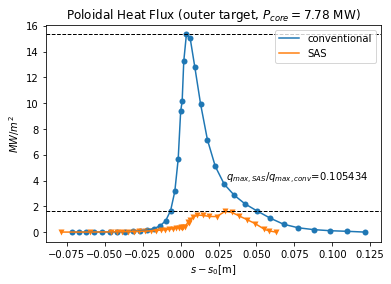

In [17]:
plt.title(r"Poloidal Heat Flux (outer target, $P_{core} =$7.78 MW)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "conventional")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "SAS")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend(loc = 'upper right')


co_KDEMO_max = np.max(np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000))
al_KDEMO_max = np.max(np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000))



plt.axhline(y=co_KDEMO_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=al_KDEMO_max, color='black', linestyle='--', linewidth=1)

frac = al_KDEMO_max/co_KDEMO_max
plt.text(0.03, 4, r'$q_{max,SAS}/q_{max,conv}$=%f ' %frac )
plt.savefig("SAS vs conventional(7.78MW).png")


plt.show()

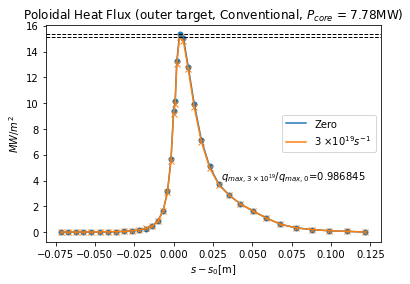

In [18]:
plt.title(r"Poloidal Heat Flux (outer target, Conventional, $P_{core}$ = 7.78MW)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()

zero_max = np.max(np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000))
e19_max = np.max(np.abs(fht_b2fplasmf_co_KDEMO_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000))


plt.axhline(y=zero_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=e19_max, color='black', linestyle='--', linewidth=1)

frac = e19_max/zero_max
plt.text(0.03, 4, r'$q_{max,3\times 10^{19}}/q_{max,0}$=%f ' %frac )

plt.savefig("conv heat flux w.r.t impurity P7.78.png")


plt.show()

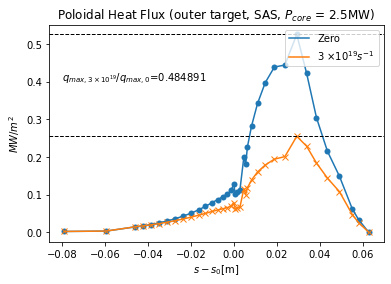

In [19]:
plt.title(r"Poloidal Heat Flux (outer target, SAS, $P_{core}$ = 2.5MW)")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')


al_KSTAR_zero_max = np.max(np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000))
al_KSTAR_e19_max = np.max(np.abs(fht_b2fplasmf_al_KSTAR_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000))


plt.axhline(y=al_KSTAR_zero_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=al_KSTAR_e19_max, color='black', linestyle='--', linewidth=1)

frac = al_KSTAR_e19_max/al_KSTAR_zero_max
plt.text(-0.08, 0.4, r'$q_{max,3\times 10^{19}}/q_{max,0}$=%f ' %frac )

plt.legend(loc="upper right")
plt.savefig("al heat flux w.r.t impurity P2.5.png")



plt.show()

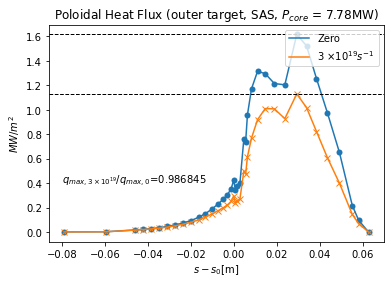

In [20]:
plt.title(r"Poloidal Heat Flux (outer target, SAS, $P_{core}$ = 7.78MW)")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')


al_zero_max = np.max(np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000))
al_e19_max = np.max(np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000))


plt.axhline(y=al_zero_max, color='black', linestyle='--', linewidth=1)
plt.axhline(y=al_e19_max, color='black', linestyle='--', linewidth=1)

frac = e19_max/zero_max
plt.text(-0.08, 0.4, r'$q_{max,3\times 10^{19}}/q_{max,0}$=%f ' %frac )

plt.legend(loc="upper right")

plt.savefig("al heat flux w.r.t impurity P7.78.png")



plt.show()

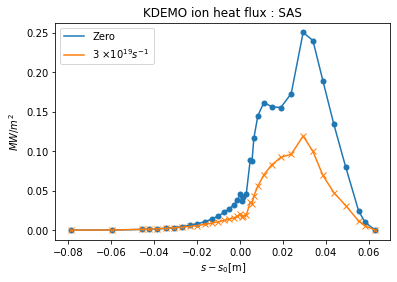

In [21]:
plt.title("KDEMO ion heat flux : SAS")
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()


plt.show()

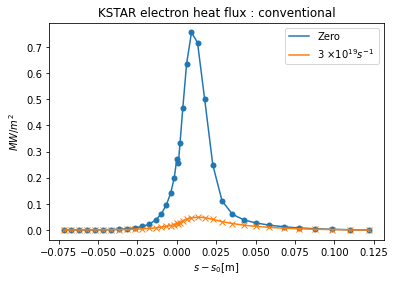

In [22]:
plt.title("KSTAR electron heat flux : conventional")


plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()


plt.show()

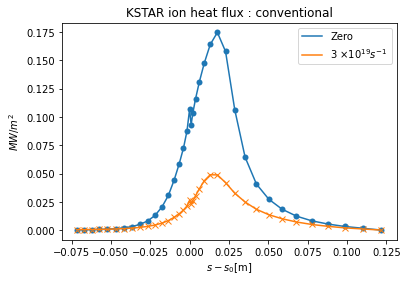

In [23]:
plt.title("KSTAR ion heat flux : conventional")


plt.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"Zero")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = r"3 $\times 10^{19}s^{-1}$")

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$MW/m^2$')
plt.legend()


plt.show()

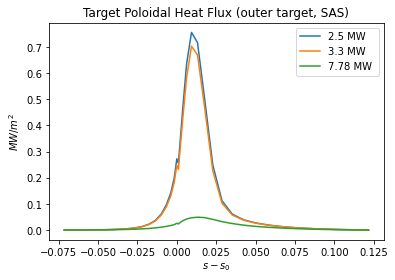

In [24]:
plt.title("Target Poloidal Heat Flux (outer target, SAS)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "2.5 MW ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "3.3 MW ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "7.78 MW ")


plt.xlabel(r'$s-s_0$')
plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux.png")



In [25]:
#check = np.load("./../fht_b2fplasmf_co_KSTAR_ws3_3e16Ne.npy")
#check_local = np.load("./../fht_b2fplasmf_conv_KSTAR_check.npy")
#check_ion = np.load("./../fhi_b2fstate_conv_KSTAR_check.npy")

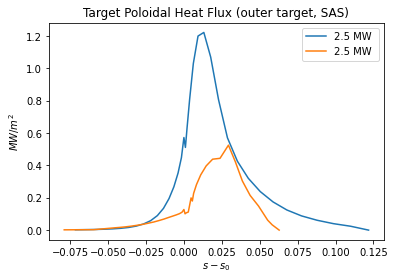

In [26]:
plt.title("Target Poloidal Heat Flux (outer target, SAS)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "2.5 MW ")
plt.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KSTAR_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "2.5 MW ")

#plt.plot(conv_sep_out_target_dist[1:], np.abs(check_local[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "2.5 MW ")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(check_ion[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "2.5 MW ")






plt.xlabel(r'$s-s_0$')
plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux.png")

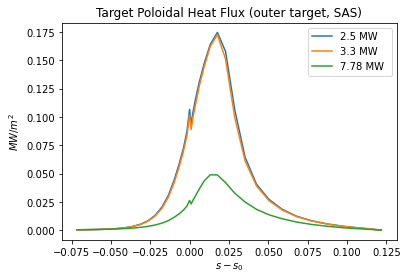

In [27]:
plt.title("Target Poloidal Heat Flux (outer target, SAS)")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "2.5 MW ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "3.3 MW ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "7.78 MW ")


plt.xlabel(r'$s-s_0$')
plt.ylabel(r'$MW/m^2$')
plt.legend()
#plt.savefig("SAS heat flux.png")



/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/639597843.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rqrad_b2fplasmf_co_KDEMO_ZeroNe,axis = 0)/1000000)


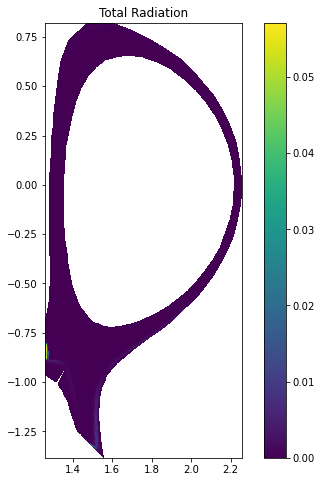

In [28]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Total Radiation")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rqrad_b2fplasmf_co_KDEMO_ZeroNe,axis = 0)/1000000)
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/526129030.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, po_b2fplasmf_al_KDEMO_noNe)


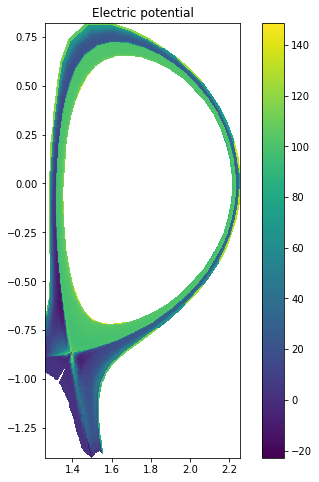

In [29]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Electric potential")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(almesh_x_cen, almesh_y_cen, po_b2fplasmf_al_KDEMO_noNe)
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/96860021.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, po_b2fplasmf_co_KDEMO_noNe)


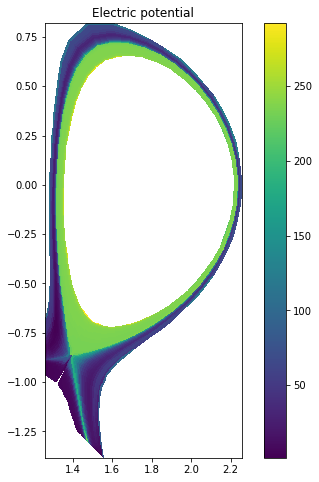

In [30]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Electric potential")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, po_b2fplasmf_co_KDEMO_noNe)
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

In [31]:
print(po_b2fplasmf_co_KSTAR_noNe[:,18])

[113.27798271  99.24242152  95.88880527  94.26899346  93.34389729
  92.76057822  92.32430312  91.93578012  91.57917519  91.28118598
  91.04494706  90.94715598  91.10000012  91.6037596   92.45415728
  93.36005863  93.58773996  91.99372473  87.37257921  81.41653811
  73.62655908  58.71445219  43.36943705  31.58170485  23.00919646
  17.15755741  13.46401317  11.79117162  12.15440956  13.75235513
  15.74060327  17.9838826   21.81021024  27.87363707  33.82711214
  35.86541018  34.20795551  58.69915471]


/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/1561054772.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rrahi_b2fplasmf_co_32MW_noNe,axis = 0)/1000000)


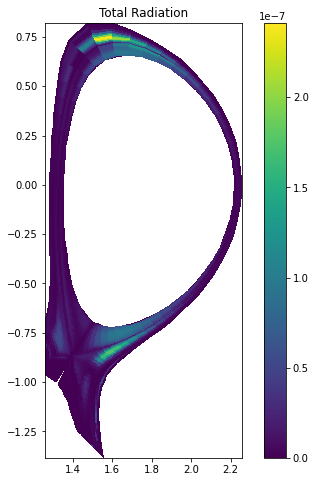

In [32]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Total Radiation")
#plt.xlim(1.4,1.6)
#plt.ylim(-1.4,-1.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rrahi_b2fplasmf_co_32MW_noNe,axis = 0)/1000000)
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

In [33]:
np.shape(rrana_b2fplasmf_al_KDEMO_3e19Ne)

(20, 38, 98)

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/3216446203.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.sum(rrana_b2fplasmf_al_KDEMO_3e19Ne/(10**(19)),axis = 0))


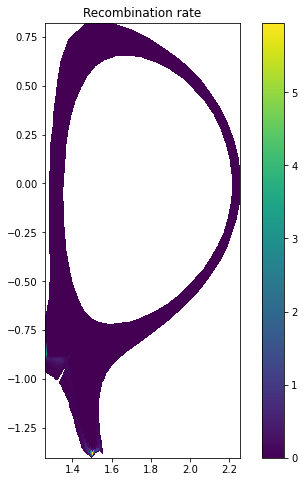

In [34]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Recombination rate")
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.8)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.sum(rrana_b2fplasmf_al_KDEMO_3e19Ne/(10**(19)),axis = 0))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/2487892938.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rrana_b2fplasmf_co_KSTAR_noNe,axis = 0)/(10**(19)))


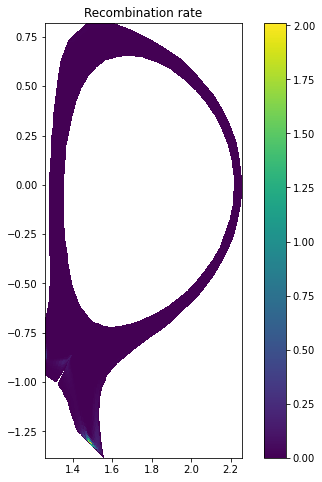

In [35]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Recombination rate")
#plt.xlim(1.2,1.6)
#plt.ylim(-1.4,-0.8)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rrana_b2fplasmf_co_KSTAR_noNe,axis = 0)/(10**(19)))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/840428602.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rsana_b2fplasmf_co_KDEMO_noNe,axis = 0)/(10**(19)))


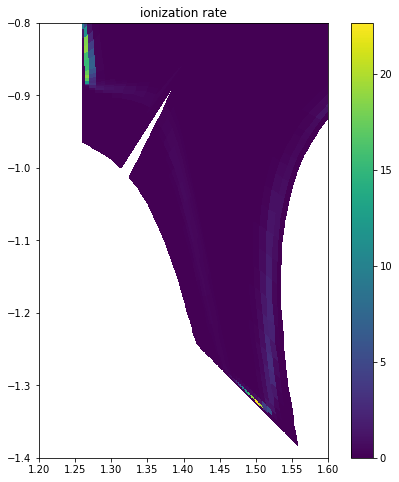

In [36]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("ionization rate")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.8)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, np.sum(rsana_b2fplasmf_co_KDEMO_noNe,axis = 0)/(10**(19)))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/2353746088.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.sum(rsana_b2fplasmf_al_KDEMO_noNe,axis = 0)/(10**(19)))


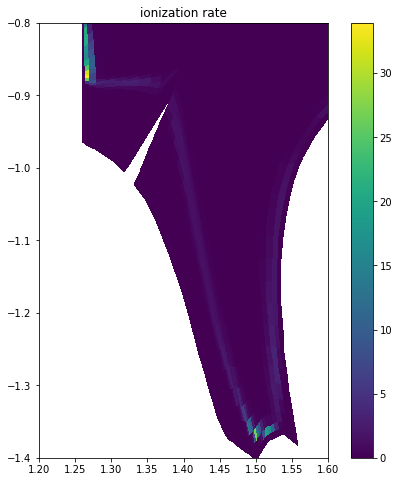

In [37]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("ionization rate")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.8)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.sum(rsana_b2fplasmf_al_KDEMO_noNe,axis = 0)/(10**(19)))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]
 
plt.colorbar()

plt.show()

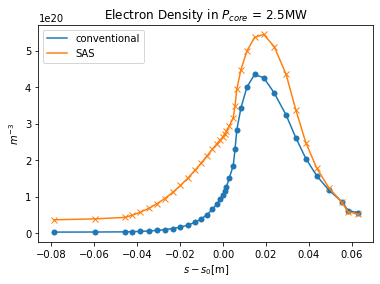

In [38]:
plt.title(r"Electron Density in $P_{core}$ = 2.5MW")
plt.plot(al_sep_out_target_dist[1:],(ne_b2fstate_co_KSTAR_noNe[1:,96]), label = r"conventional")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], (ne_b2fstate_al_KSTAR_noNe[1:,96]),label = r"SAS")

plt.scatter(al_sep_out_target_dist[1:],(ne_b2fstate_co_KSTAR_noNe[1:,96]),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:],(ne_b2fstate_al_KSTAR_noNe[1:,96]),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$m^{-3}$')
plt.legend()


plt.show()

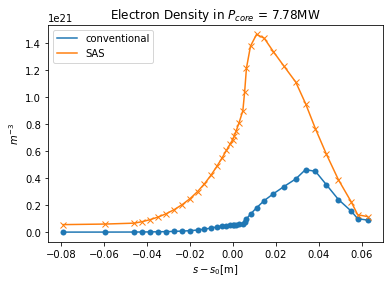

In [39]:
plt.title(r"Electron Density in $P_{core}$ = 7.78MW")
plt.plot(al_sep_out_target_dist[1:],(ne_b2fstate_co_KDEMO_noNe[1:,96]), label = r"conventional")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], (ne_b2fstate_al_KDEMO_noNe[1:,96]),label = r"SAS")

plt.scatter(al_sep_out_target_dist[1:],(ne_b2fstate_co_KDEMO_noNe[1:,96]),marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:],(ne_b2fstate_al_KDEMO_noNe[1:,96]),marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$m^{-3}$')

plt.legend()


plt.show()

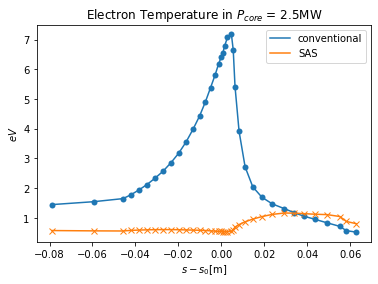

In [40]:
plt.title(r"Electron Temperature in $P_{core}$ = 2.5MW")
plt.plot(al_sep_out_target_dist[1:],(te_b2fstate_co_KSTAR_noNe[1:,96])/eV, label = r"conventional")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], (te_b2fstate_al_KSTAR_noNe[1:,96])/eV,label = r"SAS")

plt.scatter(al_sep_out_target_dist[1:],(te_b2fstate_co_KSTAR_noNe[1:,96])/eV,marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:],(te_b2fstate_al_KSTAR_noNe[1:,96])/eV,marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()


plt.show()

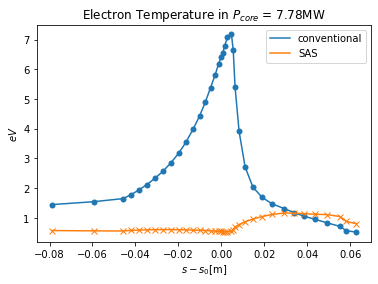

In [41]:
plt.title(r"Electron Temperature in $P_{core}$ = 7.78MW")
plt.plot(al_sep_out_target_dist[1:],(te_b2fstate_co_KSTAR_noNe[1:,96])/eV, label = r"conventional")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = r"3 $\times 10^{16}$")
plt.plot(al_sep_out_target_dist[1:], (te_b2fstate_al_KSTAR_noNe[1:,96])/eV,label = r"SAS")

plt.scatter(al_sep_out_target_dist[1:],(te_b2fstate_co_KSTAR_noNe[1:,96])/eV,marker = 'o',linewidth = 0)
#plt.scatter(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0)
plt.scatter(al_sep_out_target_dist[1:],(te_b2fstate_al_KSTAR_noNe[1:,96])/eV,marker = 'x',linewidth = 1)
plt.xlabel(r'$s-s_0$[m]')
plt.ylabel(r'$eV$')
plt.legend()


plt.show()

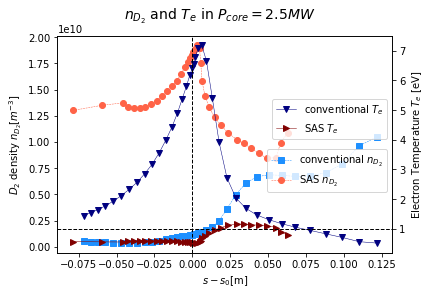

In [42]:
fig,ax = plt.subplots()
plt.suptitle(r'$n_{D_2}$ and $T_e$ in $P_{core}=2.5MW$',fontsize=14)


ax.plot(conv_sep_out_target_dist[1:],(na_b2fstate_co_KSTAR_noNe[0,1:,96]),marker = 's',linestyle = '--',linewidth = 0.5,color='dodgerblue', label = r"conventional $n_{D_2}$")
ax.plot(al_sep_out_target_dist[1:],(na_b2fstate_al_KSTAR_noNe[0,1:,96]), marker = 'o',linestyle = '--',linewidth = 0.5,color='tomato',label = r"SAS $n_{D_2}$")
ax.set_xlabel(r'$s-s_0$[m]')
ax.set_ylabel(r'$D_2$ density $ n_{D_2} [m^{-3}]$',fontsize=10)


ax2=ax.twinx()



ax2.plot(conv_sep_out_target_dist[1:],(te_b2fstate_co_KSTAR_noNe[1:,96]/eV),marker = 'v',linewidth = 0.5, color='navy', label = r"conventional $T_e$")
ax2.plot(al_sep_out_target_dist[1:],(te_b2fstate_al_KSTAR_noNe[1:,96]/eV),marker = '>',linewidth = 0.5,color='maroon',label = r"SAS $T_e$")

ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)


ax2.set_ylabel(r"Electron Temperature $T_e$ [eV]",fontsize=10) 

ax.legend(loc='upper right',bbox_to_anchor=(1, 0.5))
ax2.legend(loc='lower right',bbox_to_anchor=(1, 0.5))

#plt.legend()
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.savefig("2.5MW detachment.png")


plt.show()

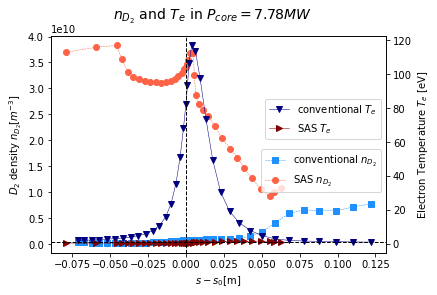

In [43]:
fig,ax = plt.subplots()
plt.suptitle(r'$n_{D_2}$ and $T_e$ in $P_{core}=7.78MW$',fontsize=14)



ax.plot(conv_sep_out_target_dist[1:],(na_b2fstate_co_KDEMO_noNe[0,1:,96]),marker = 's',linestyle = '--',linewidth = 0.5,color='dodgerblue', label = r"conventional $n_{D_2}$")
ax.plot(al_sep_out_target_dist[1:],(na_b2fstate_al_KDEMO_noNe[0,1:,96]), marker = 'o',linestyle = '--',linewidth = 0.5,color='tomato',label = r"SAS $n_{D_2}$")
ax.set_xlabel(r'$s-s_0$[m]')
ax.set_ylabel(r'$D_2$ density $ n_{D_2} [m^{-3}]$',fontsize=10)


ax2=ax.twinx()



ax2.plot(conv_sep_out_target_dist[1:],(te_b2fstate_co_KDEMO_noNe[1:,96]/eV),marker = 'v',linewidth = 0.5, color='navy', label = r"conventional $T_e$")
ax2.plot(al_sep_out_target_dist[1:],(te_b2fstate_al_KDEMO_noNe[1:,96]/eV),marker = '>',linewidth = 0.5,color='maroon',label = r"SAS $T_e$")


ax2.set_ylabel(r"Electron Temperature $T_e$ [eV]",fontsize=10) 

ax.legend(loc='upper right',bbox_to_anchor=(1, 0.5))
ax2.legend(loc='lower right',bbox_to_anchor=(1, 0.5))

#plt.legend()
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)


plt.savefig("7.78MW detachment.png")


plt.show()

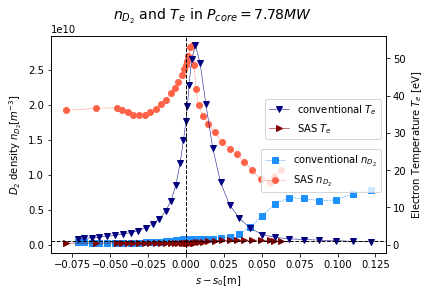

In [44]:
fig,ax = plt.subplots()
plt.suptitle(r'$n_{D_2}$ and $T_e$ in $P_{core}=7.78MW$',fontsize=14)



ax.plot(conv_sep_out_target_dist[1:],(na_b2fstate_co_KDEMO_3e19Ne[0,1:,96]),marker = 's',linestyle = '--',linewidth = 0.5,color='dodgerblue', label = r"conventional $n_{D_2}$")
ax.plot(al_sep_out_target_dist[1:],(na_b2fstate_al_KDEMO_3e19Ne[0,1:,96]), marker = 'o',linestyle = '--',linewidth = 0.5,color='tomato',label = r"SAS $n_{D_2}$")
ax.set_xlabel(r'$s-s_0$[m]')
ax.set_ylabel(r'$D_2$ density $ n_{D_2} [m^{-3}]$',fontsize=10)


ax2=ax.twinx()



ax2.plot(conv_sep_out_target_dist[1:],(te_b2fstate_co_KDEMO_3e19Ne[1:,96]/eV),marker = 'v',linewidth = 0.5, color='navy', label = r"conventional $T_e$")
ax2.plot(al_sep_out_target_dist[1:],(te_b2fstate_al_KDEMO_3e19Ne[1:,96]/eV),marker = '>',linewidth = 0.5,color='maroon',label = r"SAS $T_e$")


ax2.set_ylabel(r"Electron Temperature $T_e$ [eV]",fontsize=10) 

ax.legend(loc='upper right',bbox_to_anchor=(1, 0.5))
ax2.legend(loc='lower right',bbox_to_anchor=(1, 0.5))

#plt.legend()
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)


#plt.savefig("7.78MW detachment.png")


plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_11627/3497407393.py:10: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, total_pressure(ne_b2fstate_al_KSTAR_noNe,te_b2fstate_al_KSTAR_noNe, na_b2fstate_al_KSTAR_noNe, ti_b2fstate_al_KSTAR_noNe))


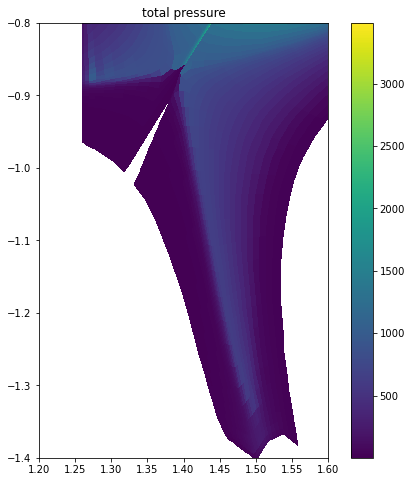

In [45]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("total pressure")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.8)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
plt.pcolormesh(almesh_x_cen, almesh_y_cen, total_pressure(ne_b2fstate_al_KSTAR_noNe,te_b2fstate_al_KSTAR_noNe, na_b2fstate_al_KSTAR_noNe, ti_b2fstate_al_KSTAR_noNe))
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]
 
plt.colorbar()

plt.show()


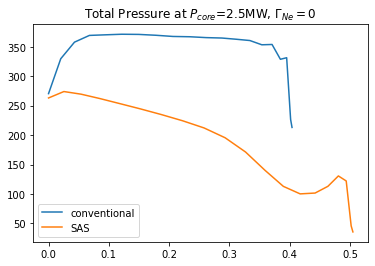

In [46]:
total_pressure_al_KSTAR_noNe=total_pressure(ne_b2fstate_al_KSTAR_noNe,te_b2fstate_al_KSTAR_noNe, na_b2fstate_al_KSTAR_noNe, ti_b2fstate_al_KSTAR_noNe)
total_pressure_co_KSTAR_noNe=total_pressure(ne_b2fstate_co_KSTAR_noNe,te_b2fstate_co_KSTAR_noNe, na_b2fstate_co_KSTAR_noNe, ti_b2fstate_co_KSTAR_noNe)


po_index = 18
plt.title(r"Total Pressure at $P_{core}$=2.5MW, $\Gamma_{Ne} = 0$")


plt.plot(conv_Xpt_dist,total_pressure_co_KSTAR_noNe[po_index,78:],label="conventional")
plt.plot(al_Xpt_dist,total_pressure_al_KSTAR_noNe[po_index,78:],label= "SAS")


plt.legend()
plt.show()

In [47]:
total_pressure_co_KSTAR_noNe[po_index,78:]

array([270.39386538, 329.63186813, 357.80784552, 369.24973149,
       370.25420894, 371.23475323, 370.95535933, 369.50636085,
       367.48107696, 366.97753802, 365.51354218, 364.80555949,
       362.70371676, 360.55594967, 353.33013963, 353.85513416,
       328.7152631 , 331.36389914, 226.43945617, 212.97647569])

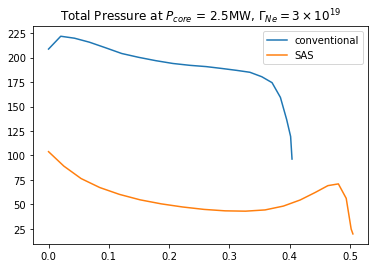

In [48]:
total_pressure_al_KSTAR_3e19Ne=total_pressure(ne_b2fstate_al_KSTAR_3e19Ne,te_b2fstate_al_KSTAR_3e19Ne, na_b2fstate_al_KSTAR_3e19Ne, ti_b2fstate_al_KSTAR_3e19Ne)
total_pressure_co_KSTAR_3e19Ne=total_pressure(ne_b2fstate_co_KSTAR_3e19Ne,te_b2fstate_co_KSTAR_3e19Ne, na_b2fstate_co_KSTAR_3e19Ne, ti_b2fstate_co_KSTAR_3e19Ne)


po_index = 18
plt.title(r"Total Pressure at $P_{core}$ = 2.5MW, $\Gamma_{Ne} = 3\times 10^{19}$")

plt.plot(conv_Xpt_dist,total_pressure_co_KSTAR_3e19Ne[po_index,78:],label="conventional")
plt.plot(al_Xpt_dist,total_pressure_al_KSTAR_3e19Ne[po_index,78:],label= "SAS")
plt.legend()
plt.show()

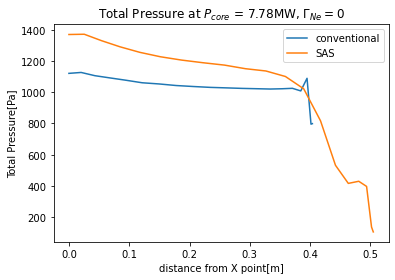

In [49]:
total_pressure_al_KDEMO_noNe=total_pressure(ne_b2fstate_al_KDEMO_noNe,te_b2fstate_al_KDEMO_noNe, na_b2fstate_al_KDEMO_noNe, ti_b2fstate_al_KDEMO_noNe)
total_pressure_co_KDEMO_noNe=total_pressure(ne_b2fstate_co_KDEMO_noNe,te_b2fstate_co_KDEMO_noNe, na_b2fstate_co_KDEMO_noNe, ti_b2fstate_co_KDEMO_noNe)

plt.title(r"Total Pressure at $P_{core}$ = 7.78MW, $\Gamma_{Ne} = 0$")
po_index = 18
plt.plot(conv_Xpt_dist,total_pressure_co_KDEMO_noNe[po_index,78:],label="conventional")
plt.plot(al_Xpt_dist,total_pressure_al_KDEMO_noNe[po_index,78:],label= "SAS")

plt.xlabel(r'distance from X point[m]')
plt.ylabel(r'Total Pressure[Pa]')
plt.savefig("7.78MW pressure.png")

plt.legend()
plt.show()

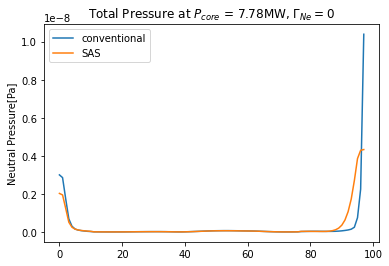

In [50]:
neutral_pressure_al_KDEMO_noNe=neutral_pressure(na_b2fstate_al_KDEMO_3e19Ne, ti_b2fstate_al_KDEMO_3e19Ne)
neutral_pressure_co_KDEMO_noNe=neutral_pressure(na_b2fstate_co_KDEMO_3e19Ne, ti_b2fstate_co_KDEMO_3e19Ne)

plt.title(r"Total Pressure at $P_{core}$ = 7.78MW, $\Gamma_{Ne} = 0$")
po_index = 18
#plt.plot(conv_Xpt_dist,neutral_pressure_co_KDEMO_noNe[po_index,78:],label="conventional")
#plt.plot(al_Xpt_dist,neutral_pressure_al_KDEMO_noNe[po_index,78:],label= "SAS")
plt.plot(neutral_pressure_co_KDEMO_noNe[po_index],label="conventional")
plt.plot(neutral_pressure_al_KDEMO_noNe[po_index],label= "SAS")



#plt.plot(total_pressure_co_KDEMO_noNe[po_index],label="conventional")
#plt.plot(total_pressure_al_KDEMO_noNe[po_index],label= "SAS")
#plt.xlabel(r'distance from X point[m]')
plt.ylabel(r'Neutral Pressure[Pa]')
#plt.savefig("7.78MW neutral pressure.png")

plt.legend()
plt.show()

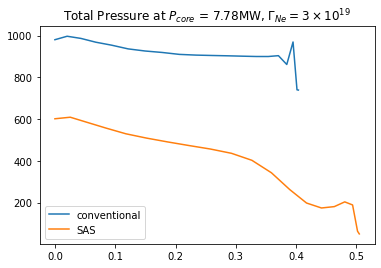

In [51]:
total_pressure_al_KDEMO_3e19Ne=total_pressure(ne_b2fstate_al_KDEMO_3e19Ne,te_b2fstate_al_KDEMO_3e19Ne, na_b2fstate_al_KDEMO_3e19Ne, ti_b2fstate_al_KDEMO_3e19Ne)
total_pressure_co_KDEMO_3e19Ne=total_pressure(ne_b2fstate_co_KDEMO_3e19Ne,te_b2fstate_co_KDEMO_3e19Ne, na_b2fstate_co_KDEMO_3e19Ne, ti_b2fstate_co_KDEMO_3e19Ne)

plt.title(r"Total Pressure at $P_{core}$ = 7.78MW, $\Gamma_{Ne} = 3\times 10^{19}$")
po_index = 18
plt.plot(conv_Xpt_dist,total_pressure_co_KDEMO_3e19Ne[po_index,78:],label="conventional")
plt.plot(al_Xpt_dist,total_pressure_al_KDEMO_3e19Ne[po_index,78:],label= "SAS")


plt.legend()
plt.show()

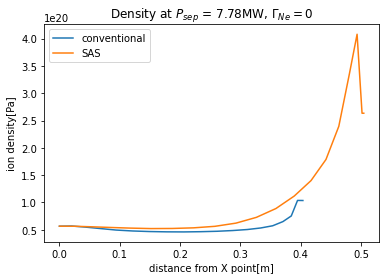

In [52]:
plt.title(r"Density at $P_{sep}$ = 7.78MW, $\Gamma_{Ne} = 0$")
po_index = 18
plt.plot(conv_Xpt_dist,np.sum(na_b2fstate_co_KSTAR_noNe[:,po_index,78:], axis =0),label="conventional")
plt.plot(al_Xpt_dist,np.sum(na_b2fstate_al_KSTAR_noNe[:,po_index,78:], axis =0),label= "SAS")

plt.xlabel(r'distance from X point[m]')
plt.ylabel(r'ion density[Pa]')
#plt.savefig("7.78MW neutral pressure.png")

plt.legend()
plt.show()

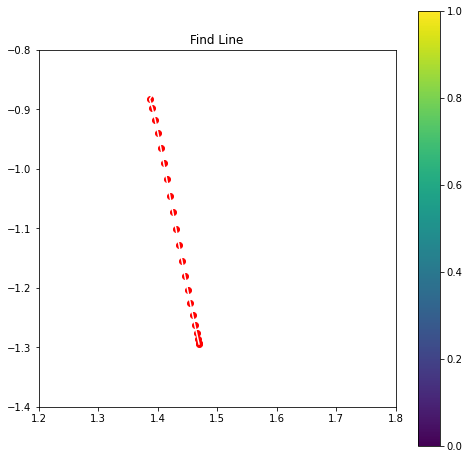

In [53]:

plt.figure(figsize=(8, 8))

ra_index = 18

plt.axes().set_aspect('equal')

plt.title("Find Line")
plt.xlim(1.2,1.8)
plt.ylim(-1.4,-0.8)
plt.plot(convmesh_x_cen[ra_index,:],convmesh_y_cen[ra_index,:], color='white')
plt.scatter(convmesh_x_cen[ra_index,77:],convmesh_y_cen[ra_index,77:], color='red')

plt.colorbar()

plt.show()

In [54]:

plt.figure(figsize=(8, 8))

ra_index = 18
for i in range(38):
    if i==ra_index:
        line[i,:] = 100*line[i,:]

plt.axes().set_aspect('equal')

plt.title("Find Line")
plt.xlim(1.2,1.8)
plt.ylim(-1.4,-0.8)
plt.pcolormesh(almesh_x_cen, almesh_y_cen, back)
plt.plot(almesh_x_cen[ra_index,:],almesh_y_cen[ra_index,:], color='white')
plt.scatter(almesh_x_cen[ra_index,77:],almesh_y_cen[ra_index,77:], color='red')

plt.colorbar()

plt.show()

NameError: name 'line' is not defined

<Figure size 576x576 with 0 Axes>

In [ ]:
np.shape(almesh_x_cen[ra_index,77:])